In [1]:
# Configuración del entorno
import tensorflow as tf
print("GPU disponible:", len(tf.config.list_physical_devices('GPU')) > 0)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 6)
print("Todo listo")

GPU disponible: False
Todo listo


In [2]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(64,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,794 (776.54 KB)

 Trainable params: 198,794 (776.54 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
digits = load_digits()
X = digits.data
y = digits.target

# Normalización
X = X / 16.0

# encoding para Keras
y_cat = to_categorical(y, 10)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1437, 64)
X_test shape: (360, 64)


In [4]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4105 - loss: 1.9595 - val_accuracy: 0.8576 - val_loss: 0.5797
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8640 - loss: 0.4984 - val_accuracy: 0.9375 - val_loss: 0.2321
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9350 - loss: 0.2326 - val_accuracy: 0.8993 - val_loss: 0.2896
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9373 - loss: 0.2233 - val_accuracy: 0.9514 - val_loss: 0.1500
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9625 - loss: 0.1449 - val_accuracy: 0.9653 - val_loss: 0.1263
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9713 - loss: 0.0973 - val_accuracy: 0.9410 - val_loss: 0.1449
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9720 - loss: 0.0977 - val_accuracy: 0.9618 - val_loss: 0.1119
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9877 - loss: 0.0543 - val_accuracy: 0.9618 - val_

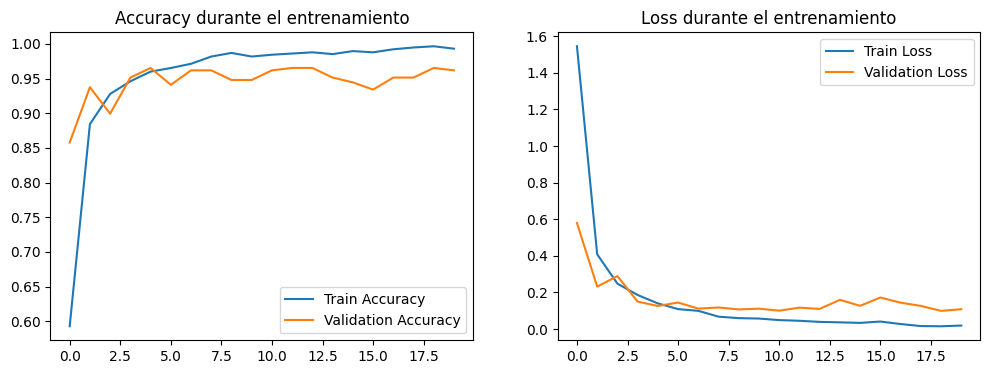

In [5]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante el entrenamiento')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante el entrenamiento')
plt.legend()

plt.show()

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nAccuracy final en test: {test_acc:.4f} ({test_acc*100:.2f}%)")


Accuracy final en test: 0.9778 (97.78%)
